In [19]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

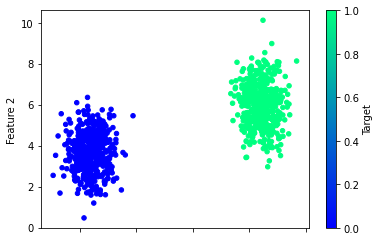

In [20]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df

# Plot data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [21]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Standardize data
# As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. 
# In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize.

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit data onto scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [23]:
# Create Keras Sequential Model
nn_model = tf.keras.models.Sequential()

# Add first dense layer (includes input layer)
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
#inputs_dim is number of inputs
#units is number of neurons in hidden layer
#activation is activation function to use
#https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.10587&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=true&regularization_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&showTestData_hide=true&noise_hide=true&batchSize_hide=true

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model (double check model structure)
nn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# evaluation metric: measures the quality of the machine learning model. Two main types of evaluation metrics: 1. the model predictive accuracy 2. model mean squared error (MSE). We use accuracy for classification models and msefor regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.
# optimization function: shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability
# loss: metric used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input (loss predicts model's ability to predict single data point)


In [25]:
#training model (epochs is number of complete times through training data)
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 326us/sample - loss: 0.9810 - acc: 0.0000e+00
Epoch 2/100
750/750 [==============================] - 0s 29us/sample - loss: 0.9523 - acc: 0.0000e+00
Epoch 3/100
750/750 [==============================] - 0s 32us/sample - loss: 0.9266 - acc: 0.0013
Epoch 4/100
750/750 [==============================] - 0s 30us/sample - loss: 0.9030 - acc: 0.0027
Epoch 5/100
750/750 [==============================] - 0s 30us/sample - loss: 0.8819 - acc: 0.0040
Epoch 6/100
750/750 [==============================] - 0s 29us/sample - loss: 0.8632 - acc: 0.0040
Epoch 7/100
750/750 [==============================] - 0s 32us/sample - loss: 0.8460 - acc: 0.0067
Epoch 8/100
750/750 [==============================] - 0s 32us/sample - loss: 0.8310 - acc: 0.0093
Epoch 9/100
750/750 [==============================] - 0s 32us/sample - loss: 0.8172 - acc: 0.0093
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 

750/750 [==============================] - 0s 31us/sample - loss: 0.2253 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2200 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2149 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 30us/sample - loss: 0.2099 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2051 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 27us/sample - loss: 0.2005 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 29us/sample - loss: 0.1960 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1917 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1875 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 28us/sample - loss: 0.1834 - acc: 1.0000
Epoch 92/100


<AxesSubplot:>

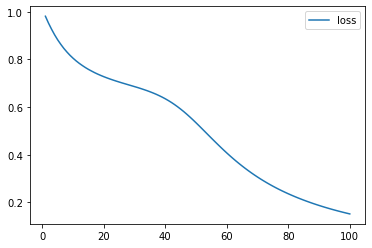

In [26]:
# Visualizing loss over epoch number

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

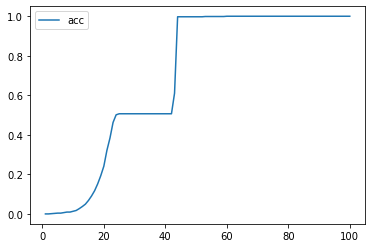

In [27]:
# Plot the accuracy
history_df.plot(y="acc")

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss:.3}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.1508 - acc: 1.0000
Loss: 0.151, Accuracy: 1.0


In [31]:
# Testing model on new data

# making new data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

### linear data works well with basic single-neuron, single-layer models. 
### The following is practice with more complicated, non-linear data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

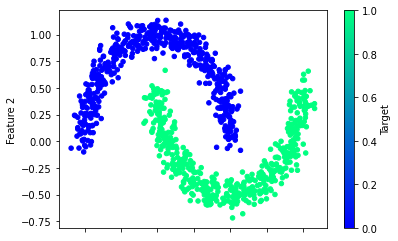

In [39]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [42]:
# Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. 
# The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state = 78)

# Create a scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train) 
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

# Training model with non-linear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 60us/sample - loss: 1.0237 - acc: 0.3947
Epoch 2/100
750/750 [==============================] - 0s 30us/sample - loss: 0.9618 - acc: 0.4120
Epoch 3/100
750/750 [==============================] - 0s 31us/sample - loss: 0.9088 - acc: 0.4253
Epoch 4/100
750/750 [==============================] - 0s 30us/sample - loss: 0.8711 - acc: 0.4387
Epoch 5/100
750/750 [==============================] - 0s 31us/sample - loss: 0.8403 - acc: 0.4493
Epoch 6/100
750/750 [==============================] - 0s 30us/sample - loss: 0.8153 - acc: 0.4547
Epoch 7/100
750/750 [==============================] - 0s 30us/sample - loss: 0.7943 - acc: 0.4613
Epoch 8/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7758 - acc: 0.4720
Epoch 9/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7599 - acc: 0.4813
Epoch 10/100
750/750 [==============================] - 0s 32us/sample - loss: 0.7456 - 

750/750 [==============================] - 0s 29us/sample - loss: 0.4717 - acc: 0.7520
Epoch 83/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4695 - acc: 0.7560
Epoch 84/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4673 - acc: 0.7573
Epoch 85/100
750/750 [==============================] - 0s 27us/sample - loss: 0.4651 - acc: 0.7587
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4630 - acc: 0.7600
Epoch 87/100
750/750 [==============================] - 0s 29us/sample - loss: 0.4607 - acc: 0.7627
Epoch 88/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4587 - acc: 0.7640
Epoch 89/100
750/750 [==============================] - 0s 30us/sample - loss: 0.4566 - acc: 0.7653
Epoch 90/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4544 - acc: 0.7667
Epoch 91/100
750/750 [==============================] - 0s 27us/sample - loss: 0.4523 - acc: 0.7680
Epoch 92/100


<AxesSubplot:>

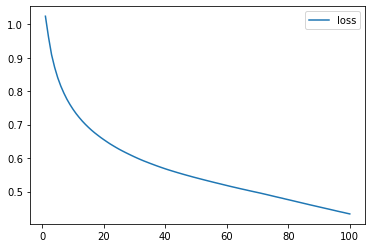

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index = range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot.line(y="loss")

<AxesSubplot:>

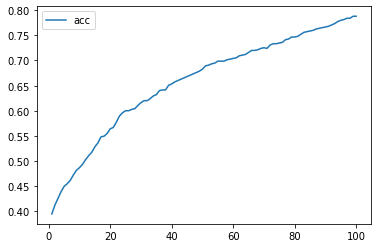

In [44]:
# Plot accuracy
history_df.plot.line(y="acc")

# Accuracy wasn't very high. 
# the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.


In [ ]:
# advantages to adding neurons to our hidden layer in a neural network:
# - There is a distributed effort to find optimal weights—faster.
# - Each neuron can focus on different features to identify nonlinear effects—smarter.
# - It is less likely to fixate on complex variables—more robust.

# Why to limit numbers of neurons:
# - overfitting (the neural network will not generalize well and won't be able to classify new data correctly)
# - computation resources (training a large neural network requires more data, more epochs, and more time)

# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.


In [49]:
# Adding neurons to neural network (Since we want to change the structure of our neural network model, we must first create a new Sequential model)

# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

# add inputs and hidden layers
number_inputs = 2
number_hidden_nodes = 6  #aka neurons

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile new Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

# as we increase the number of neurons within the hidden layer, the classification accuracy improves. 
# adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.


Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 310us/sample - loss: 0.7199 - acc: 0.3973
Epoch 2/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6933 - acc: 0.4013
Epoch 3/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6693 - acc: 0.4680
Epoch 4/100
750/750 [==============================] - 0s 33us/sample - loss: 0.6466 - acc: 0.5320
Epoch 5/100
750/750 [==============================] - 0s 29us/sample - loss: 0.6245 - acc: 0.5973
Epoch 6/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6023 - acc: 0.6573
Epoch 7/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5798 - acc: 0.6907
Epoch 8/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5568 - acc: 0.7213
Epoch 9/100
750/750 [==============================] - 0s 32us/sample - loss: 0.5340 - acc: 0.7387
Epoch 10/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5121 -

750/750 [==============================] - 0s 31us/sample - loss: 0.2150 - acc: 0.9080
Epoch 83/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2139 - acc: 0.9093
Epoch 84/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2128 - acc: 0.9107
Epoch 85/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2118 - acc: 0.9107
Epoch 86/100
750/750 [==============================] - 0s 30us/sample - loss: 0.2107 - acc: 0.9120
Epoch 87/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2096 - acc: 0.9133
Epoch 88/100
750/750 [==============================] - 0s 31us/sample - loss: 0.2085 - acc: 0.9133
Epoch 89/100
750/750 [==============================] - 0s 32us/sample - loss: 0.2073 - acc: 0.9147
Epoch 90/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2061 - acc: 0.9147
Epoch 91/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2049 - acc: 0.9147
Epoch 92/100


In [ ]:
# How to optimize neural network
# - Check out your input dataset. (no variables or set of outliers that are causing the model to be confused. Could plot a pandas series)
# - Add more neurons to a hidden layer.
# - Add additional hidden layers.
# - Use a different activation function for the hidden layers.
# - Add additional epochs to the training regimen.

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

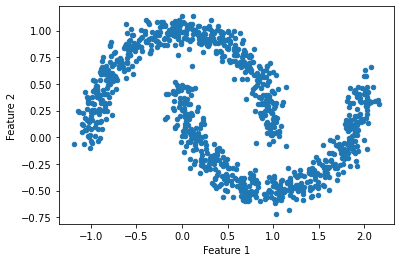

In [52]:
# ranking the four most-used activation functions by data complexity and ideal use case, the order would be as follows:
# - The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
# - The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
# - The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
# - The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

# By default, the Keras Dense layer will implement the linear activation function, which means that the net sum value is not transformed
# The linear activation function limits the neural network model to only perform a linear regression. Therefore, the linear activation function is only appropriate for an output layer.